In [1]:
print("all ok")

all ok


In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error

x,y= make_regression(n_samples=100,n_informative=1,n_features=1,n_targets=1,noise=20,random_state=13)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [6]:
lin=LinearRegression()
lin.fit(x_train,y_train)

print(lin.coef_)
print(lin.intercept_)

[26.84461765]
-1.2624275567282277


In [7]:
import matplotlib.pyplot as plt

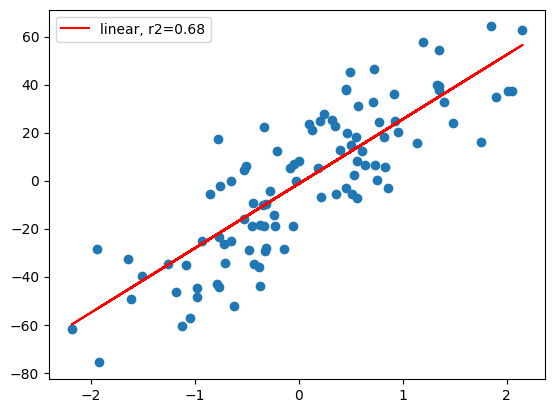

In [15]:
plt.scatter(x,y)
plt.plot(x,lin.predict(x),color='red',label=f'linear, r2={round(r2_score(y_test,lin.predict(x_test)),2)}')
plt.legend()
plt.show()

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+04, tolerance: 9.560e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

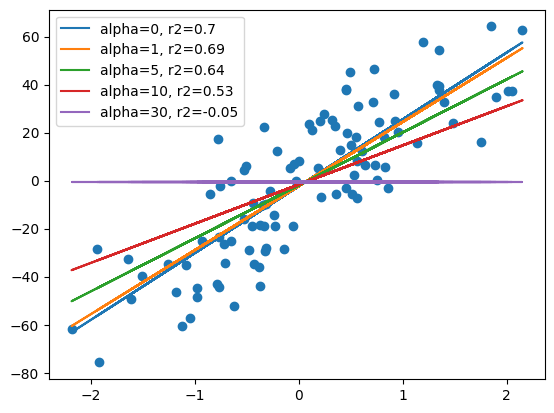

In [12]:

from sklearn.linear_model import Lasso

plt.scatter(x,y)
alphas=[0,1,5,10,30]
for alpha in alphas:
    las=Lasso(alpha=alpha)
    las.fit(x,y)
    plt.plot(x,las.predict(x),label=f'alpha={alpha}, r2={round(r2_score(y_test,las.predict(x_test)),2)}')
plt.legend()
plt.show()

## For Polynimial data

In [16]:
import numpy as np

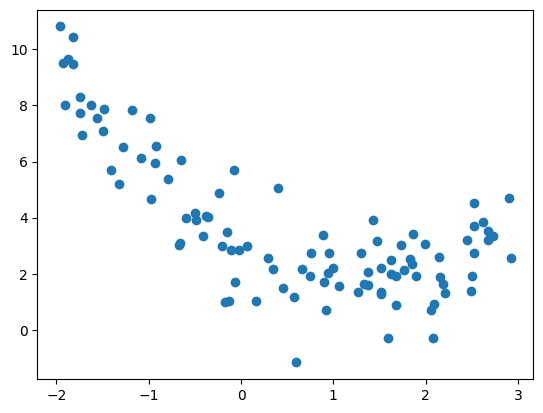

In [17]:
m=100
x1= 5 * np.random.rand(m,1) - 2
x2= 0.7 * x1 **2 -2 * x1 +3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.683e+01, tolerance: 6.397e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

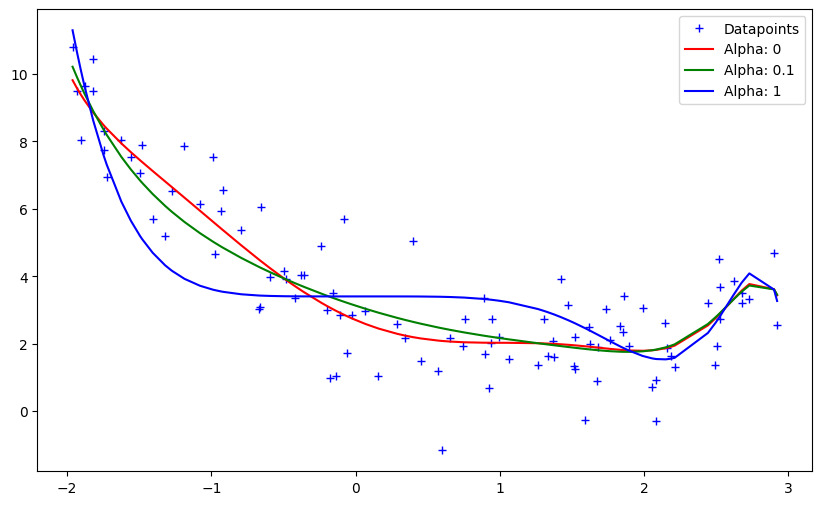

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_pred_lasso(x1,x2, alpha):
    model=Pipeline([
        ('poly_features', PolynomialFeatures(degree=16)),
        ('ridge', Lasso(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas=[0,0.1,1]
cs=['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    preds=get_pred_lasso(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])],c, label=f'Alpha: {alpha}')
    #plt.plot(x1, preds,c, label=f'Alpha: {alpha}')

plt.legend()
plt.show()

In [21]:
def get_pred_lasso(x1,x2, alpha):
    model=Pipeline([
        ('poly_features', PolynomialFeatures(degree=16)),
        ('ridge', Lasso(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

y_pred=get_pred_lasso(x1,x2,alpha=0)

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.683e+01, tolerance: 6.397e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

In [25]:
y_pred

array([2.23974413, 2.82459819, 1.86092361, 4.91489329, 2.03128933,
       2.86182872, 2.06496474, 2.08468859, 1.99654515, 2.04526684,
       2.4514828 , 1.81991557, 3.58062435, 1.91168846, 2.19782347,
       3.69809031, 1.94512379, 2.97674762, 1.95311675, 1.91319205,
       7.93917976, 2.85420545, 8.85278233, 2.0303614 , 1.92439666,
       4.49889598, 7.12051597, 1.99763729, 2.89487864, 2.09318096,
       1.82107248, 2.87918201, 1.96905069, 9.81227296, 4.46601787,
       3.57608438, 2.04389659, 3.53124541, 5.42012995, 5.56242512,
       2.01048968, 2.58695444, 1.88577779, 5.62303488, 3.57096084,
       3.90074434, 1.81433571, 3.61643273, 1.95472793, 8.4784044 ,
       1.81750871, 2.15773119, 8.37814994, 8.46434749, 2.80028632,
       3.94173189, 2.03174336, 9.21273578, 3.07205806, 2.02977858,
       2.29350218, 1.86537775, 9.38896232, 2.74694063, 1.87535849,
       1.84767936, 7.67921186, 1.79246751, 4.44248533, 2.02997228,
       3.1254453 , 2.00572007, 6.80987399, 8.8540907 , 3.21194

In [24]:
y_pred[np.argsort(x1[:,0])]

array([9.81227296, 9.5635469 , 9.38896232, 9.21273578, 8.8540907 ,
       8.85278233, 8.4784044 , 8.46434749, 8.37814994, 7.93917976,
       7.67921186, 7.4422321 , 7.38798658, 7.12051597, 6.80987399,
       6.64438387, 6.33072584, 5.94344968, 5.62303488, 5.56242512,
       5.42012995, 5.36340826, 4.91489329, 4.49889598, 4.46601787,
       4.44248533, 4.23451182, 3.94173189, 3.90074434, 3.69809031,
       3.58062435, 3.53124541, 3.21194245, 3.1254453 , 3.07205806,
       3.0188789 , 2.97674762, 2.91826752, 2.85420545, 2.82459819,
       2.74694063, 2.58695444, 2.4514828 , 2.29350218, 2.23974413,
       2.19782347, 2.15773119, 2.09318096, 2.08468859, 2.06496474,
       2.04526684, 2.04389659, 2.03174336, 2.03128933, 2.0303614 ,
       2.02997228, 2.02977858, 2.02899631, 2.02809025, 2.01608535,
       2.01048968, 2.00572007, 1.99763729, 1.99654515, 1.98443554,
       1.96905069, 1.95472793, 1.95430656, 1.95311675, 1.92439666,
       1.91319205, 1.91168846, 1.88798309, 1.88577779, 1.86092

### Effects of Lasso

#1. Coefficient impact

In [30]:
from sklearn.datasets import load_diabetes
import pandas as pd
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [31]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=12)
coef=[]
r2_scores=[]
alphas=[0,0.1,1,10]

for alpha in alphas:
    rid=Lasso(alpha=alpha)
    rid.fit(x_train,y_train)

    r2_values=r2_score(y_test,rid.predict(x_test))
    r2_scores.append(r2_values)
    coef.append(rid.coef_.tolist())

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.961e+05, tolerance: 2.168e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

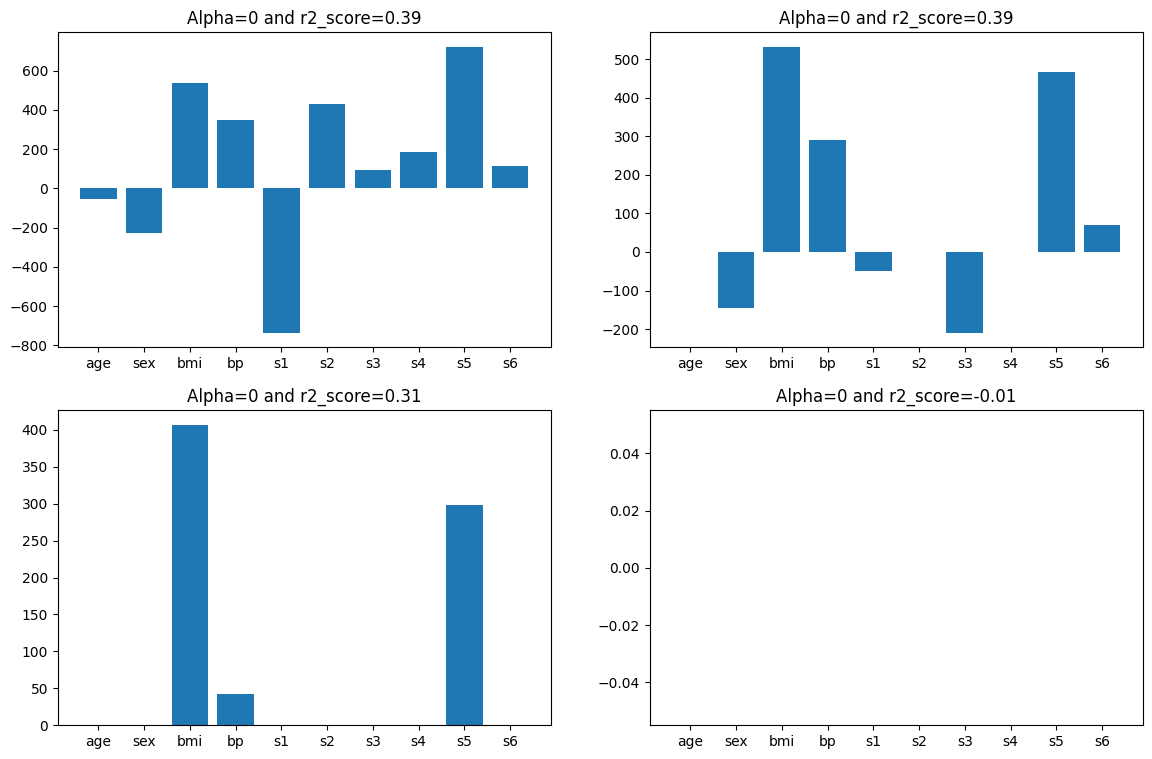

In [32]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coef[0])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[0],2)}')

plt.subplot(222)
plt.bar(data.feature_names,coef[1])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[1],2)}')

plt.subplot(223)
plt.bar(data.feature_names,coef[2])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[2],2)}')

plt.subplot(224)
plt.bar(data.feature_names,coef[3])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[3],2)}')

plt.show()

#2. Impact on higher coef

In [46]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.961e+05, tolerance: 2.168e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

In [47]:
input_array = np.array(coefs)
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                
0.0000  -53.927164 -228.979243  535.293466  350.367406 -736.211724   
0.0001  -53.837079 -228.897145  535.310964  350.308388 -729.063485   
0.0010  -53.026363 -228.158340  535.468337  349.777218 -664.753974   
0.0100  -46.222741 -218.509461  539.064015  344.468133 -256.432306   
0.1000   -0.000000 -144.911568  532.099973  291.101115  -50.340478   
1.0000    0.000000    0.000000  406.059057   41.666135    0.000000   
10.0000   0.000000    0.000000    0.000000    0.000000    0.000000   

                 s2          s3          s4          s5          s6  
alpha                                                                
0.0000   427.423949   94.802801  184.239510  721.915528  115.460884  
0.0001   421.933350   91.374083  183.012185  719.266486  115.443123  
0.0010   372.537204   60.526771  171.969417  695.434438  115.283255  
0.0100    46.406594 -112.127703  126.525643  539.950128  112.369857  
0.1000    -0.000000 -209.926916    0.000000  465.521204   70.075549  
1.0000     0.000000   -0.000000    0.000000  298.352535    0.000000  
10.0000    0.000000   -0.000000    0.000000    0.000000    0.000000

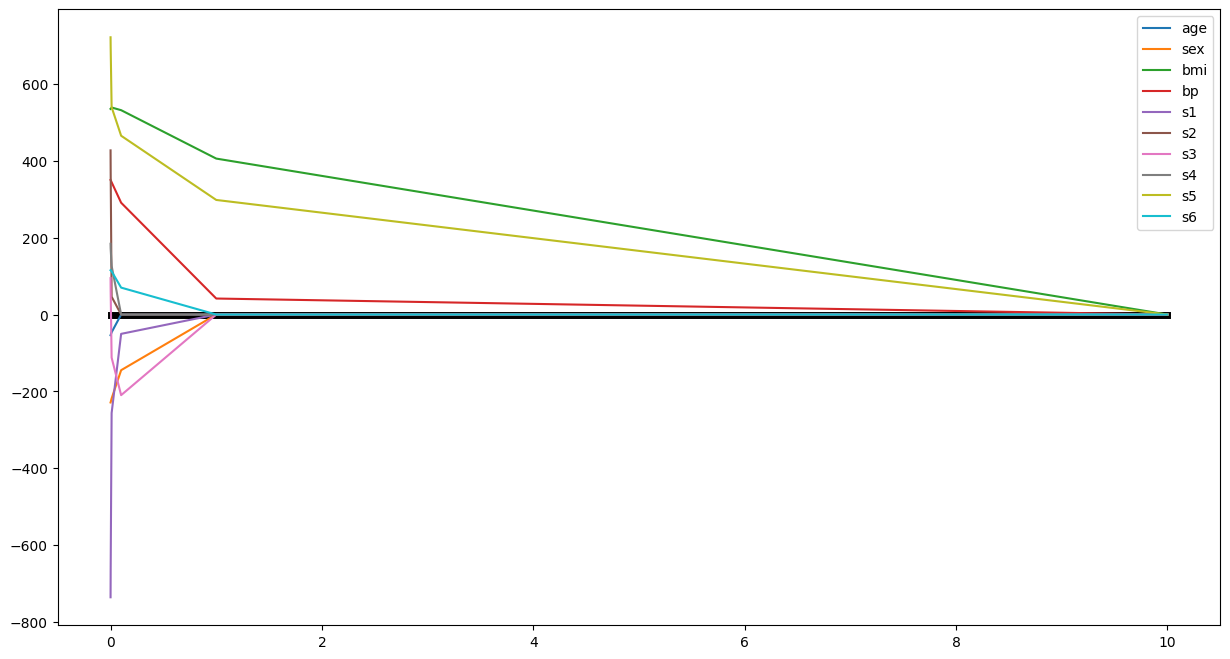

In [48]:
input_array = np.array(coefs).T
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

#3. Imapct on Bias Variance

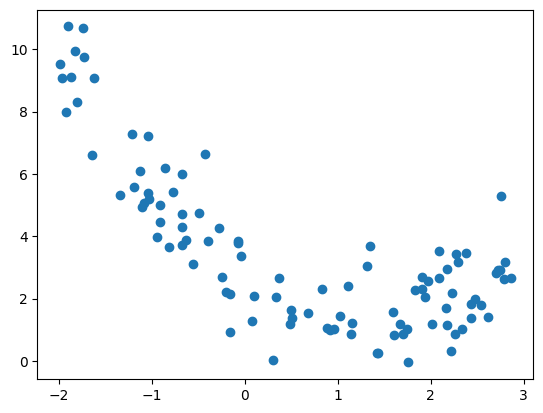

In [49]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [52]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.741e+01, tolerance: 4.938e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = 

#4. impact on loss

[27.82809103]
-2.29474455867698


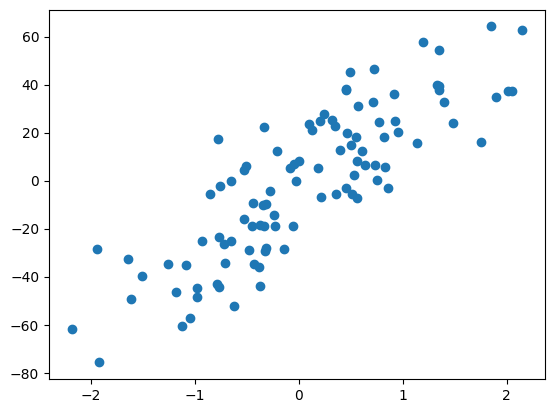

In [53]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [55]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [56]:
def predict(m):
    return m*X - 2.29

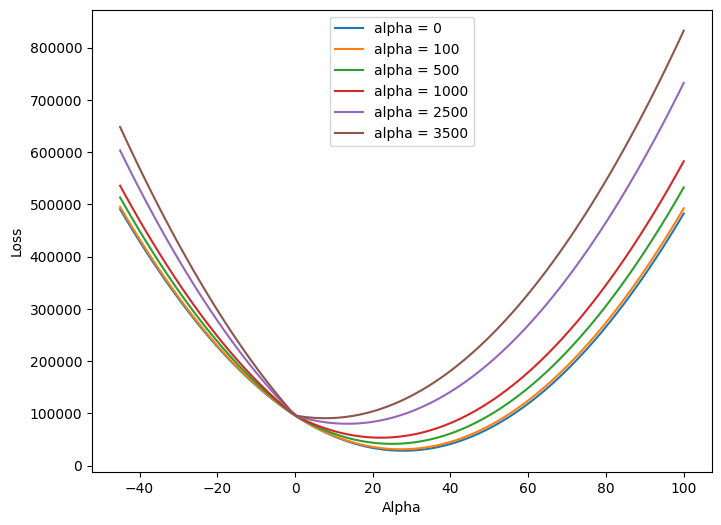

In [61]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(8,6))
for j in [0,100,500,1000,2500,3500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()